# Clasificación para un conjunto de datos


# 1. Introducción
**La clasificación supervisada** tiene como objetivo construir un modelo que pueda aprender a reconocer un patrón a partir de ejemplos dados según el dominio de aplicación, así cuando aparezca un nuevo dato de ejemplo, el sistema pueda asignar un valor al nuevo dato.    
Los métodos de clasificación supervisada se dividen en métodos de clasificación o regresión. Es posible que un mismo método pueda servir con ambos propósitos como por ejemplo las redes neuronales.   

Clasificación:   
<img src="imagenes/arbol.png" width=500>

Regresión:
<img src="imagenes/regresion_lineal.png" width=400>


**La clasificación no supervisada** tiene propósitos mas exploratorios, donde dado un conjunto de datos, se quiere agrupar estos en grupos donde al interior de cada grupo los objetos sean similares, mientras que los objetos de diferentes grupos sean diferentes. A priori estos métodos requieren establecer el número de grupos en que se quieren agrupar los datos.  


# 2. Clasificación supervisada
La clasificación supervisada se basa en el entrenamiento de modelos que puedan asignar un valor a datos nuevos. El entrenamiento requiere tener un conjunto de datos previamente marcado con su valor correspondiente con los cuales el modelo podrá aprender a reconocer el patron requerido.     
Existen dos subcategorías en la clasificación supervisada, cuando el valor a asignar al nuevo dato es categorico perteneciente a un conjunto finito se habla de modelos de **Clasificación**, y cuando se asigna un valor numérico en un rango infinito se habla de modelos de **Regresión**. Los datos o características en ambos casos pueden ser los mismo, lo que cambia es el tipo de valor objetivo.

**Métodos de clasificación y regresión**   
A continuación se presentaran algunos de los métodos de clasificación y regresión mas comunes y como usarlos en python.   

1. Regresión lineal
2. KNN


**Otros modelos**
1. Regresión logística
2. Arboles de decisión
3. Máquinas de soporte vectorial
4. Redes neuronales


# Ejemplo

In [3]:
library(tidyverse)
library(caret)  # Este paquete recoge gran variedad de modelos para aplicar sobre conjuntos de datos

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [154]:
diabetes<-read_csv('./datasets/diabetes.csv',col_names = TRUE,cols(
  preg = col_double(),
  plas = col_double(),
  pres = col_double(),
  skin = col_double(),
  insu = col_double(),
  mass = col_double(),
  pedi = col_double(),
  age = col_double(),
  class = col_character()
))

* preg: Pregnancies

* plas: Glucose

* pres: BloodPressure
* skin: SkinThickness
* insu: Insulin
* mass: BMI
* pedi: DiabetesPedigreeFunction
* age: Age
* class: Outcome

In [155]:
str(diabetes)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	768 obs. of  9 variables:
 $ preg : num  6 1 8 1 0 5 3 10 2 8 ...
 $ plas : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pres : num  72 66 64 66 40 74 50 0 70 96 ...
 $ skin : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insu : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedi : num  0.627 0.351 0.672 0.167 2.288 ...
 $ age  : num  50 31 32 21 33 30 26 29 53 54 ...
 $ class: chr  "tested_positive" "tested_negative" "tested_positive" "tested_negative" ...
 - attr(*, "spec")=
  .. cols(
  ..   preg = col_double(),
  ..   plas = col_double(),
  ..   pres = col_double(),
  ..   skin = col_double(),
  ..   insu = col_double(),
  ..   mass = col_double(),
  ..   pedi = col_double(),
  ..   age = col_double(),
  ..   class = col_character()
  .. )


In [156]:
diabetes$class<-factor(diabetes$class,levels = c('tested_positive','tested_negative'),labels = c('positive','negative'))

In [157]:
str(diabetes)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	768 obs. of  9 variables:
 $ preg : num  6 1 8 1 0 5 3 10 2 8 ...
 $ plas : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pres : num  72 66 64 66 40 74 50 0 70 96 ...
 $ skin : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insu : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedi : num  0.627 0.351 0.672 0.167 2.288 ...
 $ age  : num  50 31 32 21 33 30 26 29 53 54 ...
 $ class: Factor w/ 2 levels "positive","negative": 1 2 1 2 1 2 1 2 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   preg = col_double(),
  ..   plas = col_double(),
  ..   pres = col_double(),
  ..   skin = col_double(),
  ..   insu = col_double(),
  ..   mass = col_double(),
  ..   pedi = col_double(),
  ..   age = col_double(),
  ..   class = col_character()
  .. )


In [158]:
# Datos NA?
diabetes[!complete.cases(diabetes),]

preg,plas,pres,skin,insu,mass,pedi,age,class


## Normalización
[Contenido](#Contenido)

Existen varias técnicas de normalizar los datos:

1. **Escala común**: Cuando se traten de características comparables por alguna medida común, llevar todo a una misma escala o unidad de medición. Ejemplo: Transformar todo a centimetros, grados Farenheit, Newtons, etc.


2. **Normalización Min-Max**: Se transforma cada observación restandole el menor valor de todos los datos y se divide entre la diferencia del máximo y el mínimo. $$ \frac{x-min(x)}{max(x)-min(x)} $$


3. **Normalización Z**: Se transforma cada observación restandole la media de los datos y diviendo por la desviación estándar. $$ \frac{x-\mu(x)}{\sigma(x)} $$


In [159]:
diabetes_numericos<-diabetes[,1:8]

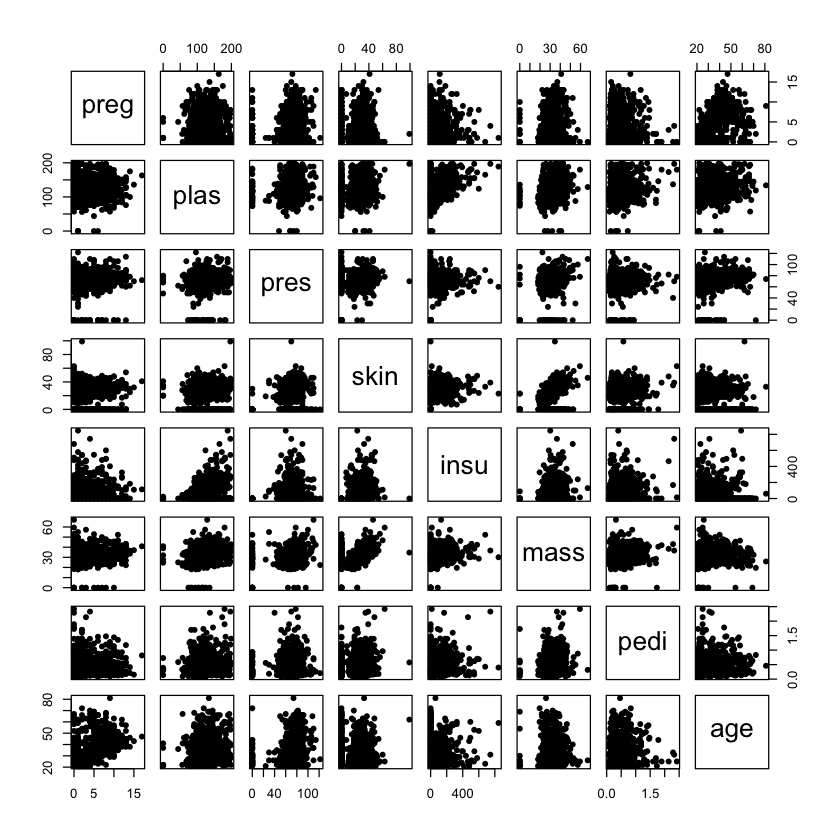

In [160]:
pairs(diabetes_numericos,pch=16)

In [161]:
diabetes_escalados<-scale(diabetes_numericos)

In [162]:
cor(diabetes_escalados)

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
plas,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
pres,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
skin,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
insu,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
mass,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
pedi,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


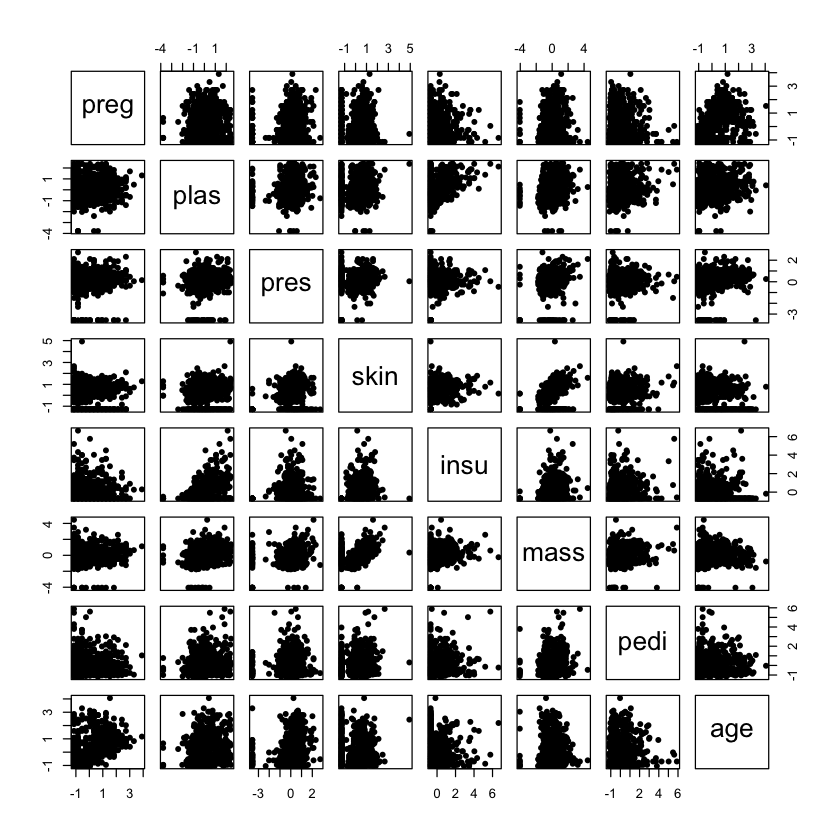

In [163]:
pairs(diabetes_escalados,pch = 16)

In [164]:
diabetes_escalados<-as.data.frame(cbind(diabetes_escalados,class = diabetes$class))

In [172]:
diabetes_escalados$class<-factor(diabetes_escalados$class,levels = c(1,2),labels = c('positive','negative'))

In [173]:
library(GGally) #Un paquete con mejoras sobre gráficos

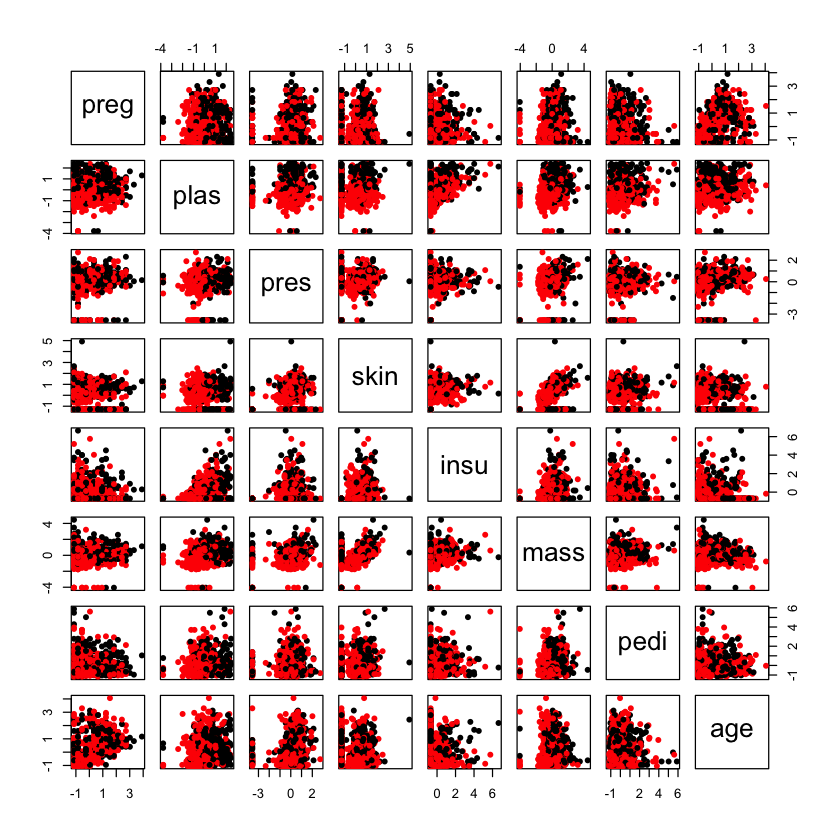

In [174]:
plot(diabetes_escalados[,1:8],col=diabetes_escalados$class,pch=16)

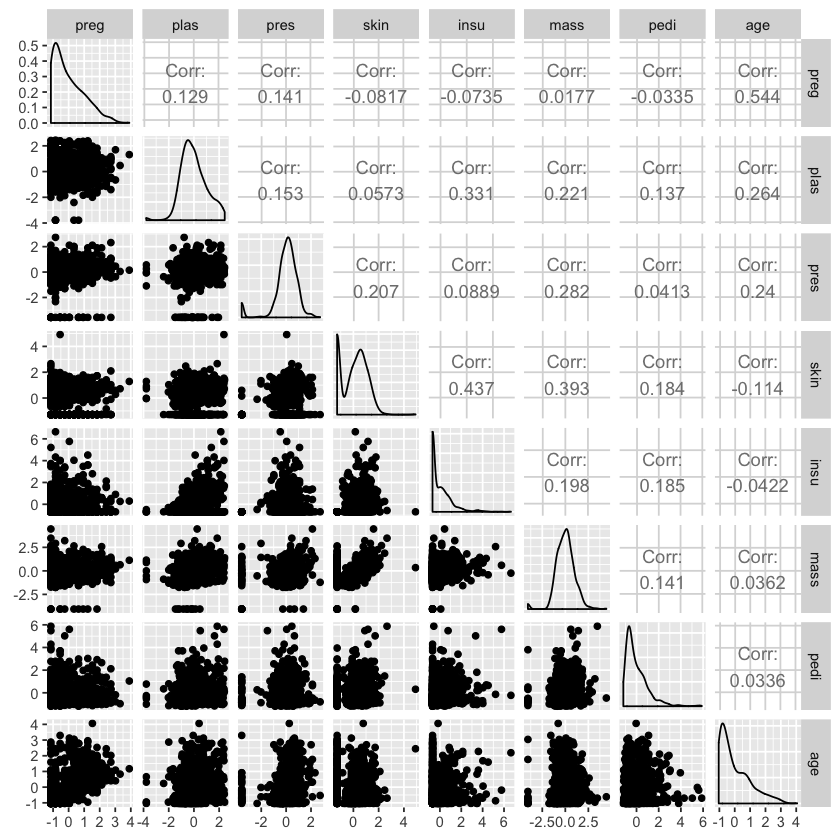

In [178]:
ggpairs(diabetes_escalados,columns = seq(1,8))

In [179]:
head(diabetes_escalados)

preg,plas,pres,skin,insu,mass,pedi,age,class
0.6395305,0.8477713,0.1495433,0.9066791,-0.6924393,0.2038799,0.4681869,1.42506672,positive
-0.8443348,-1.1226647,-0.1604412,0.5305558,-0.6924393,-0.6839762,-0.3648230,-0.19054773,negative
1.2330766,1.9424580,-0.2637694,-1.2873733,-0.6924393,-1.1025370,0.6040037,-0.10551539,positive
-0.8443348,-0.9975577,-0.1604412,0.1544326,0.1232213,-0.4937213,-0.9201630,-1.04087112,negative
-1.1411079,0.5037269,-1.5037073,0.9066791,0.7653372,1.4088275,5.4813370,-0.02048305,positive
0.3427574,-0.1530851,0.2528715,-1.2873733,-0.6924393,-0.8108128,-0.8175458,-0.27558007,negative


# KNN, k vecinos mas cercanos
Los k vacinos mas cercanos es un método de clasificación donde, a un nuevo dato, se le asigna la clase mas común entre los k vecinos mas cercanos en un conjunto de valores prototipos. Tener en cuenta que diferentes valores de k pueden arrojar diferentes resultados para los mismos datos de entrenamiento.

<img src="imagenes/knn.png" width=400>

Tener en cuenta que el método knn solo puede considerar valores numéricos de entrada.

# División de los datos en conjuntos de entrenamiento y validación
Para los modelos de aprendizaje supervisado, se pone a prueba el modelo con datos no usados durante la construcción de este. Con el objetivo de validar la utilidad del modelo además de buscar problemas que pueda presentar.

Se dividen los datos disponibles en dos conjuntos:
- el primero llamado "train" es un conjunto de datos a usar para el entrenamiento de modelos de aprendizaje de máquinas.
- el segundo llamado "test" es un conjunto de prueba, se usará para verificar la precisión del modelo construido.

Esta división es necesaria para validar que el modelo construido no sufra el problema de overfitting o sobre-entrenamiento, que es cuando un modelo aprende de forma perfecta los datos de entrenamiento, pero a la hora de evaluar un nuevo dato arroja un valor completamente errado creando así un modelo inservible.

In [182]:
set.seed(1234)

train<- caret::createDataPartition(y = diabetes_escalados$class,p = 0.8,times = 1,list = FALSE)

diabetes_train <- diabetes[train,]
diabetes_test <- diabetes[-train,]

In [183]:
m1 <- train(class~.,data = diabetes_train,method = 'knn')
m1

k-Nearest Neighbors 

615 samples
  8 predictor
  2 classes: 'positive', 'negative' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 615, 615, 615, 615, 615, 615, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7064873  0.3498874
  7  0.7168374  0.3685492
  9  0.7261733  0.3842480

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [184]:
diabetes_pred<-predict(m1, diabetes_test)

# Medidas de precisión de los modelos
La forma en que se mide que tan bueno es un modelo difiere para los modelos de clasificación a los de regresión. A continuación se muestran las mas comunes para cada caso.

**Medidas de precisión para modelos de clasificación**   
Para los modelos de clasificación, al momento de probarlos, se cuenta la cantidad de valores bien clasificados respecto al total dando así la precisión del modelo, además se puede construir la matriz de confusión, que especifica la forma en que los datos fueron clasificados para cada categoria.

$$ Precision = \frac {Aciertos}{Total} $$


<img src="imagenes/matriz_confusion.png" width=300>

**Medidas de precisión para modelos de regresión**   
El error cuadrático medio o MSE es el promedio de los errores al cuadrado, este se mide como:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_{predicho} - Y_{real})^2 $$

Un MSE pequeño indica un buen ajuste del modelo, mientras que un valor alto indica un mal ajuste. Es importante mencionar que el valor MSE tendrá una escala que dependerá de la variable objetivo, así que un valor por ejemplo 8 puede ser un MSE alto o bajo según cada aplicación.



In [185]:
confusionMatrix(diabetes_pred,diabetes_test$class)

Confusion Matrix and Statistics

          Reference
Prediction positive negative
  positive       30       19
  negative       23       81
                                          
               Accuracy : 0.7255          
                 95% CI : (0.6476, 0.7945)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.03543         
                                          
                  Kappa : 0.3828          
                                          
 Mcnemar's Test P-Value : 0.64343         
                                          
            Sensitivity : 0.5660          
            Specificity : 0.8100          
         Pos Pred Value : 0.6122          
         Neg Pred Value : 0.7788          
             Prevalence : 0.3464          
         Detection Rate : 0.1961          
   Detection Prevalence : 0.3203          
      Balanced Accuracy : 0.6880          
                                          
       'Positive' Class : positive        


# 3. Clasificación no supervisada

El análisis no-supervisado de segmentación (clustering) hacen referencia a los algortimos que son ideados para producir un grupo homogéneo de un conjunto de observaciones sin identificar sus grupos o tener previamente casos similares con grupo de pertenencia. Por lo tanto, su objetivo es encontrar la estructura subyacente de los datos a partir de similaridades entre estos. Luego, se define un cluster como un grupo de observaciones que son similiares entre ellos dentro de cluster a partir de sus características. Las características entre cada comparación de clusters debe ser heterogenea para lograr una buena segmentacion de las observaciones.

Los algoritmos de cluster utilizan medidas de distancia entre los datos con el fin de encontrar aquellos que son muy cercanos (similares). Esto es relevante ya que las características de las observaciones deben estar en una escala común para tener distancias comparables, por lo tanto es importante transformar los datos según alguna medida de normalización antes de aplicar un algoritmo de clustering.

Los métodos de clasificación no supervisada pueden ser jerarquicos o de capa única.
<img src="imagenes/iteracion_1_k_means.png" width=600>
<img src="imagenes/iteracion_2_k_means.png" width=600>
<img src="imagenes/iteracion_3_k_means.png" width=600>

In [4]:
library(NbClust)

In [5]:
agricultura<- read_delim(file = './datasets/agricultura.csv',delim = ';',col_names = TRUE,skip = 1)

Parsed with column specification:
cols(
  `ID Provincia` = col_double(),
  Provincia = col_character(),
  `ID Departamento` = col_double(),
  Departamento = col_character(),
  `Id Cultivo` = col_double(),
  Cultivo = col_character(),
  `ID Campana` = col_double(),
  Campana = col_character(),
  `Sup. Sembrada (Ha)` = col_double(),
  `Sup. Cosechada (Ha)` = col_double(),
  `Produccion (Tn)` = col_double(),
  `Rendimiento (Kg/Ha)` = col_double()
)


In [6]:
colnames(agricultura)

[1] "ID Provincia"        "Provincia"           "ID Departamento"    
 [4] "Departamento"        "Id Cultivo"          "Cultivo"            
 [7] "ID Campana"          "Campana"             "Sup. Sembrada (Ha)" 
[10] "Sup. Cosechada (Ha)" "Produccion (Tn)"     "Rendimiento (Kg/Ha)"

In [7]:
colnames(agricultura)<-str_replace_all(colnames(agricultura),'\\(|\\)|\\.|\\/|\\ ','_') # \\ sirve para escapar caracteres especiales
colnames(agricultura)<-str_replace_all(colnames(agricultura),'__','_')                  #reemplaza por un zolo _ para evitar inconvenientes
colnames(agricultura)<-str_replace_all(colnames(agricultura),regex('_$'),'')            #Empleando expresiones regulares se puede reemplazar el _ final

In [8]:
str(agricultura)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	132769 obs. of  12 variables:
 $ ID_Provincia     : num  6 6 6 6 6 6 6 6 6 6 ...
 $ Provincia        : chr  "BUENOS AIRES" "BUENOS AIRES" "BUENOS AIRES" "BUENOS AIRES" ...
 $ ID_Departamento  : num  854 854 14 14 14 14 14 14 14 14 ...
 $ Departamento     : chr  "25 DE MAYO" "25 DE MAYO" "ADOLFO GONZALES CHAVES" "ADOLFO GONZALES CHAVES" ...
 $ Id_Cultivo       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Cultivo          : chr  "Ajo" "Ajo" "Ajo" "Ajo" ...
 $ ID_Campana       : num  1 2 1 2 3 4 5 6 7 8 ...
 $ Campana          : chr  "1969/70" "1970/71" "1969/70" "1970/71" ...
 $ Sup_Sembrada_Ha  : num  3 1 15 10 8 8 10 15 15 15 ...
 $ Sup_Cosechada_Ha : num  3 1 15 10 8 8 10 15 15 15 ...
 $ Produccion_Tn    : num  10 3 82 55 44 69 85 126 81 61 ...
 $ Rendimiento_Kg_Ha: num  3333 3000 5467 5500 5500 ...
 - attr(*, "spec")=
  .. cols(
  ..   `ID Provincia` = col_double(),
  ..   Provincia = col_character(),
  ..   `ID Departamento` = col_double

In [9]:
df <- agricultura%>%select_if(is.numeric)%>%          # Selecciona las columnas que sean numericas
                        select(-starts_with('I'))     # Elimina las que empiezan por I puesto que son ID no numeros

In [10]:
df_scaled <- scale(df)                                # Escala el dataset

En este paso, el análisis de clustering se realizará iterativamente donde varios modelos con diferentes numeros de clusters se evaluarán a partir de una metrica común y determinar el número ideal *k*.

In [1]:
# options(repr.plot.width=10, repr.plot.height=5)
# NbClust(df_scaled,method = 'kmeans')

In [2]:
kmeans(df_scaled,centers = 3)

ERROR: Error in as.matrix(x): object 'df_scaled' not found


# Taller Parte 1

1. Cargar el dataset iris datasets::iris
2. Escale los datos
3. Particione el dataset 70% - 30%
4. Construya un modelo con k=3, k = 5, k=7
5. Obtenga la matriz de confucion de cada modelo
6. Cual modelo tiene mayor precision

# Taller Parte 2
1. Cargue el dataset de all.us.city.crime.1970
2. Analice los datos (relaciones entre variables, correlaciones)
3. Clusterice los datos con k=3